In [1]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import chi2_contingency
import matplotlib.patches as mpatches
import numpy as np
from numpy import linalg 

from numpy.random import randint
from scipy.stats import chisquare
from scipy.stats.contingency import expected_freq
from itertools import product
from statsmodels.graphics.mosaicplot import mosaic
from sklearn import datasets
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram


# Расстояние Пирсона

В рассмотренном примере мы полагали, что распределение ожидаемых частот является равномерным. Но ничто не мешает нам задать более интересное ожидаемое распределение частот! Рассмотрим такую ситуацию:

Монах Грегор Иоганн выращивал горох трех цветов (бедняга надеялся, что это поможет ему сделать важное открытие).  
В одном из опытов эмпирическое распределение частот некоторого цвета гороха приняло следующий вид:

18,55,27 18, 55, 27 18,55,27


Предполагаемое теоретическое распределение — 1:2:1 1 : 2 : 1 1:2:1.

**Рассчитайте расстояние хи-квадрат**

In [2]:
from scipy.stats import chisquare
chisquare([18, 55, 27], f_exp=[25, 50, 25])

Power_divergenceResult(statistic=2.62, pvalue=0.26982005638468687)

## Распределение Хи-квадрат Пирсона



Ваши ставки! Как будет выглядеть распределение расстояния хи-квадрат в нашем эксперименте с монеткой при многократном повторении эксперимента (при условии, что верна нулевая гипотеза). 

Представьте, что мы при каждом повторении эксперимента рассчитываем расстояние хи - квадрат и в итоге строим гистограмму получившихся значений.


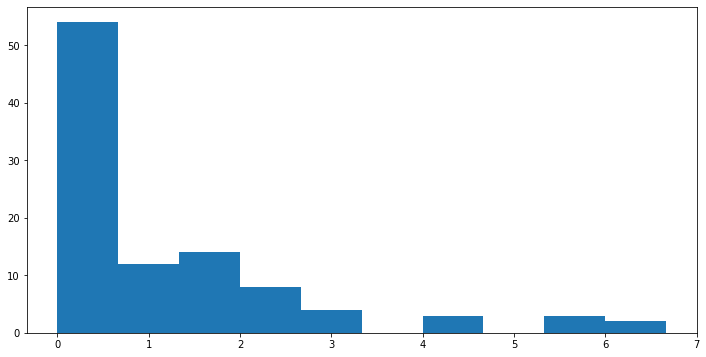

In [3]:
from numpy.random import randint
from scipy.stats import chisquare
import matplotlib.pyplot as plt
import pandas as pd

# N - number_of_throws
N, number_of_experiments = 60, 100
fig, ax = plt.subplots()
#Массив значений Хи-квадрат
chisquare_values = []

for _ in range(number_of_experiments):
    res = list(randint(0, 2, N))
    chisquare_values.append(chisquare([res.count(1), res.count(0)], f_exp=[N / 2, N / 2]).statistic)

ax.hist(chisquare_values)   
fig.set_figwidth(12)
fig.set_figheight(6)

plt.show()

In [29]:
scipy.stats.chisquare(f_obs=[10, 10, 10, 5, 10, 15], f_exp=[10, 10, 10, 10, 10, 10])

Power_divergenceResult(statistic=5.0, pvalue=0.4158801869955079)

### В таблице представлены результаты эксперимента, направленного на проверку гипотезы о взаимосвязи двух номинативных переменных с двумя градациями. Рассчитайте ожидаемые частоты для проверки нулевой гипотезы о независимости двух переменных X и Y.

In [33]:
from scipy.stats.contingency import expected_freq
expected_freq(([10, 6], [5, 15]))

array([[ 6.66666667,  9.33333333],
       [ 8.33333333, 11.66666667]])

# mosaicplot 

Разберемся, как здесь отображены наши данные. Ширина и высота каждого прямоугольника пропорциональны наблюдаемым частотам в соответствующих строках и столбцах. Цвет прямоугольника показывает величину стандартизированного остатка; если она по модулю больше 2, то прямоугольник будет полупрозрачным, если больше 4, то соответствующий прямоугольник будет закрашен.

**Итого:**
- размер прямоугольников  соответствует количеству наблюдений.
- цвет прямоугольников - величине значимости отклонения ожидаемых и наблюдаемых частот в этой ячейке.
- если значения стандартизированных остатков больше 3х, можно считать, что в этой ячейке зафиксированы значимые отклонения.

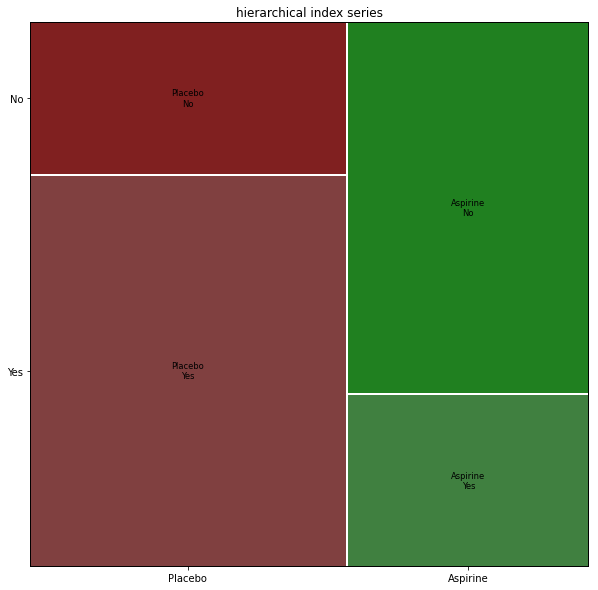

In [14]:
from itertools import product
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

tuples = list(product(['Placebo', 'Aspirine'], ['Yes', 'No']))
index = pd.MultiIndex.from_tuples(tuples)
data = pd.Series([18,7,6,13], index=index)
fig, rect = mosaic(data, title='hierarchical index series')
fig.set_size_inches(10, 10)
plt.show()

## 2й способ - с разными цветами, в зависимости от величины остатков

In [29]:
# Удивился, что нет полноценного аналога в Python, реализовал небольшую функцию на основе mosaic.
# На вход достаточно подать ей Series с двумя уровнями в Index

# Импорт необходимых модулей
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import chi2_contingency
import matplotlib.patches as mpatches
import numpy as np

def make_me_plot(data):
    # Проводим анализ таблиц сопряженности
    data = data.copy()
    obs = data.unstack().T.values
    chi, pval, dof, est = chi2_contingency(obs)
    remains = (obs - est)  / np.sqrt(est)
    
    # Присваиваем соответствующие цвета
    hex_colors = sns.color_palette("coolwarm", 6).as_hex()
    color_labels = ['<-4', '-4:-2', '-2:0', '0:2', '2:4', '>4'][::-1]
    colors = pd.Series([x  for x in remains.ravel()], index=data.index, name='color')
    valrange = np.array([-np.inf, -4, -2, 0, 2, 4, np.inf])
    color_prop = {k: {'color' : hex_colors[np.argmax(v < valrange) - 1]}  for k, v in colors.iteritems()}
    patches = [mpatches.Patch(color=c, label=l) for c, l in zip(hex_colors, color_labels)]
    
    # Передаем все данные matplotlib
    fig, ax = plt.subplots()
    fig.set_size_inches(8, 10)
    mosaic(data, gap=.02, properties=color_prop, ax=ax, labelizer= lambda x: '')
    fig.legend(handles=patches, bbox_to_anchor=(0.6, 0., 0.5, 0.5))

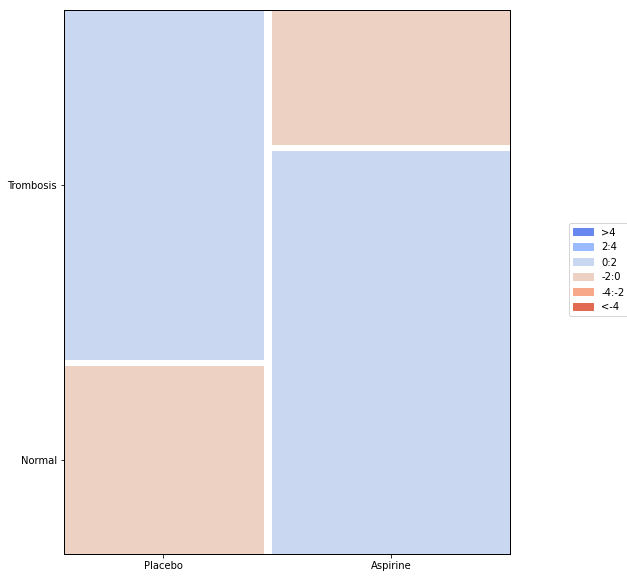

In [30]:
cure = ['Placebo', 'Aspirine']
effect = ['Normal', 'Trombosis']
idx = pd.MultiIndex.from_tuples(product(cure, effect))
data = pd.Series([7, 13, 18, 6], index=idx)

make_me_plot(data)

# ПРАКТИКА - МОДУЛЬ 1

# 1

Напишите функцию smart_test, которая получает на вход dataframe с двумя номинативными переменными с произвольным числом градаций. Функция должна проверять гипотезу о независимости этих двух переменных при помощи критерия хи - квадрат или точного критерия Фишера.

Если хотя бы в одной ячейке таблицы сопряженности двух переменных меньше 5 наблюдений, функция должна рассчитывать точный критерий Фишера и возвращать вектор из одного элемента: получившегося p - уровня значимости.

Если наблюдений достаточно для расчета хи-квадрат (во всех ячейках больше либо равно 5 наблюдений), тогда функция должна применять критерий хи-квадрат и возвращать вектор из трех элементов: значение хи-квадрат, число степеней свободы,  p-уровня значимости. 

In [96]:
# Т.к. в Python можно посчитать точный критерий Фишера ТОЛЬКО для таблицы 2х2,
# я решила не плыть против течения и добавить также размер 2х2 как обязательное условие.
# Иначе - считаем Критерий Хи-квадрат

import pandas as pd
from scipy.stats import chi2_contingency
from scipy.stats import fisher_exact
import numpy as np

def smart_test(data):
    data = data.T.values
    if data.shape == (2, 2) and is_Fishers_exact_test(data):
        oddsratio, pvalue = fisher_exact(data)
        return [pvalue]
    chi2, df, p, expected = chi2_contingency(data)
    return [chi2, df, p]

def is_Fishers_exact_test(data):
    for row in data:
        for cell in row:
            if cell < 5:
                return True
    return False

data = pd.DataFrame(data={'male': [20, 4], 'female': [15, 12]})
print(smart_test(data))

[0.039970459902635674]


# 2

Почувствуй себя биоинформатиком!  Вся наследственная информация в живых организмах хранится внутри молекулы ДНК. Эта молекула состоит из последовательности четырех "букв" — ﻿A, T, G и C. 

Напишите функцию most_significant, которая получает на вход dataframe с произвольным количеством переменных, где каждая переменная это нуклеотидная последовательность. 

In [ ]:
 V1 V2 V3
1  A  A  C
2  G  G  A
3  C  C  C
4  T  T  A
5  G  T  T
6  T  A  G

В этом примере три последовательности  V1 , V2, V3. 

Для каждой переменной мы можем проверить нулевую гипотезу о том, что все нуклеотиды (A, T, G, C) встречаются равновероятно внутри этой последовательности. Однако, возможно, что в некоторых последовательностях распределение частоты встречаемости каждого нуклеотида отличается от равномерного.

Функция должна возвращать вектор с ﻿названием переменной (или переменных), в которой был получен минимальный p - уровень значимости при проверке гипотезы о равномерном распределении нуклеотидов при помощи критерия хи - квадрат. 

In [129]:
from scipy.stats import chisquare

from_csv = pd.read_csv("https://stepic.org/media/attachments/course/524/test_data.csv")

def most_significant(df):
    # приведем DataFrame в удобный вид: {'V1': [6, 7, 10, 7], 'V2': [6, 9, 10, 5], ...}
    data = reshape_df(df)
    # Посчитаем критерий Хи-квадрат для каждого из векторов и запишем его pvalue в Dictionary
    res = {key: chisquare(val).pvalue for key, val in data.items()}
    min_pvalue = min(res.values())
    # return all vector names with min pvalue
    return [key for key, val in res.items() if val == min_pvalue]

def reshape_df(from_csv):
    data = {}
    for col_name in from_csv:
        col = from_csv.groupby([col_name]).count().unstack()[:4][:]
        dnk = [cell for cell in col]
        data[col_name] = dnk
    return data

most_significant(from_csv)

['V3']

# 3

В лекциях я говорил, что иногда возникает необходимость перекодировать количественную переменную в номинативную. Однако зачастую мы можем создавать новую номинативную переменную, комбинируя значения нескольких количественных переменных. Рассмотрим такой пример.

Воспользуемся встроенными в R данными Iris. Они сразу доступны для работы. Если вы не знакомы с историей этого набора данных, вызовите справку:

?iris 

Создайте новую переменную important_cases - фактор с двумя градациями ("No" и "Yes"). Переменная должна принимать значение Yes, если для данного цветка значения хотя бы трех количественных переменных выше среднего. В противном случае переменная important_cases  будет принимать значение No.

Таким образом, если хотя бы три переменные превышают среднее значение по выборке, тогда  значение переменной important_cases будет "Yes".

Что должно получиться:

> table(iris$important_cases)
 No Yes 
 81  69 

In [150]:
# Решаю задачу для данных по разным Штатам США

data = pd.read_csv(r'C:\Audiobooks\ForDS\states.csv').drop(['state'], axis=1)
data.head()

,metro_res,white,hs_grad,poverty,female_house
0,55.4,71.3,79.9,14.6,14.2
1,65.6,70.8,90.6,8.3,10.8
2,88.2,87.7,83.8,13.3,11.1
3,52.5,81.0,80.9,18.0,12.1
4,94.4,77.5,81.1,12.8,12.6


In [171]:
# Mean for each column
mean_values = [data[row].mean() for row in data]
# All data in Numpy format
rows = data.values

result = {'No': 0, 'Yes': 0}
for row in rows:
    # Сравниваем каждую запись со среднеми значениями.
    # count_nonzero - Считаем 'True', т.е. сколько ячеек в каждой строке по значению больше, чем среднее
    if (np.count_nonzero(row > mean_values)) >= 3:
        result['Yes'] += 1
    else:
        result['No'] += 1

print(result)

{'No': 25, 'Yes': 26}


# 3b

Обобщим предыдущую задачу! Напишем функцию get_important_cases, которая принимает на вход dataframe с произвольным числом количественных переменных (гарантируется хотя бы две переменные). Функция должна возвращать dataframe с новой переменной - фактором important_cases.

Переменная  important_cases принимает значение Yes, если для данного наблюдения больше половины количественных переменных имеют значения больше среднего. В противном случае переменная important_cases принимает значение No.

Переменная  important_cases - фактор с двумя уровнями 0 - "No", 1  - "Yes".  То есть даже если в каком-то из тестов все наблюдения получили значения "No", фактор должен иметь две градации. 

Я написал об этой важной особенности факторов в небольшой памятке. 

Пример работы функции. 


> get_important_cases(test_data)

>  V1 V2 V3 V4 V5 important_cases

>1 16 17 25 20 16              No

>2 21  7 23 22 17              No

>3 18 16 27 18 19             Yes


In [207]:
# Решаю задачу для данных по разным Штатам США

data = pd.read_csv(r'C:\Audiobooks\ForDS\states.csv').drop(['state'], axis=1)
data.head()

def get_important_cases(data):
    # Mean for each column
    mean_values = [data[row].mean() for row in data]
    important_cases = []
    half = len(mean_values) / 2
    
    for index, row in data.iterrows():
        # Сравниваем каждую запись со среднеми значениями.
        # count_nonzero - Считаем 'True', т.е. сколько ячеек в каждой строке по значению больше, чем среднее
        if (np.count_nonzero(row > mean_values)) > half:
            important_cases.append('Yes')
        else:
            important_cases.append('No')
    data['important_cases'] = important_cases    
    return data

get_important_cases(data).head()

,metro_res,white,hs_grad,poverty,female_house,important_cases
0,55.4,71.3,79.9,14.6,14.2,No
1,65.6,70.8,90.6,8.3,10.8,No
2,88.2,87.7,83.8,13.3,11.1,Yes
3,52.5,81.0,80.9,18.0,12.1,No
4,94.4,77.5,81.1,12.8,12.6,Yes


# 4

Посчитать моду

In [212]:
import statistics
# возвращает первую найденную моду, даже если их больше
statistics.mode([1, 1, 1, 2, 3, 3, 3, 4, 5])

# возвращает все моды
statistics.multimode([1, 1, 5, 2, 3, 3, 4, 5])

[1, 5, 3]

# 5 стандартизированные остатки

Доктор Пилюлькин решил вооружиться статистикой, чтобы сравнить эффективность трех лекарств! Давайте поможем ему и напишем функцию max_resid, которая получает на вход dataframe с двумя переменными: типом лекарства и результатом его применения. 

Drugs - фактор с тремя градациями: drug_1, drug_2, drug_3.     

Result - фактор с двумя градациями: positive, negative.

Функция должна находить ячейку таблицы сопряженности с максимальным  значением стандартизированного остатка и возвращать вектор из двух элементов: название строчки и столбца этой ячейки.

Python не считает стандартизированные остатки. Придется их считать самим

In [221]:
data = pd.read_csv("https://stepic.org/media/attachments/course/524/test_drugs.csv")
data.head()

,Drugs,Result
0,drug_3,positive
1,drug_1,negative
2,drug_1,negative
3,drug_2,positive
4,drug_1,negative


In [279]:
from scipy.stats import chi2_contingency

def max_resid(data):
    data['count'] = 1
    observed = data.groupby(['Drugs', 'Result']).count().unstack()
    
    chi, pvalue, dof, expected = chi2_contingency(observed)
    remains = (observed - expected) / expected ** 0.5
    max_remain = remains.values.max()
    res = [index + '!' + ind[:][-1] for index, row in remains.iterrows() \
           for ind, cell in row.items() \
           if max_remain == cell]
    return res[0].split('!')

max_resid(data)

['drug_1', 'positive']

# 6 построим гистограмму частот

Основной способ визуализировать распределение частот номинативной переменной - гистограмма частот (барплот).


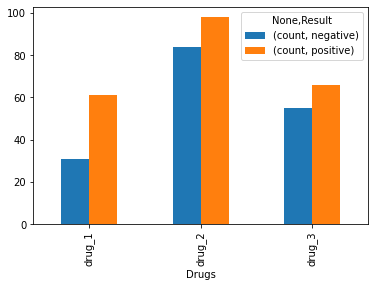

In [292]:
#df = df.pivot(columns='non_striker',index='batsman').fillna(0)
#plot it
observed.plot(kind = 'bar',legend = True)
plt.show()

### Создайте и напечатайте (с помощью функции print) массив класса np.ndarray ширины 4 и высоты 3 с двойками на главной диагонали и единицами на первой диагонали над главной, т.е. воплощение матрицы
(210002100021) \begin{pmatrix}2 & 1 & 0 & 0 \\ 0 & 2 & 1 & 0 \\ 0 & 0 & 2 & 1 \end{pmatrix} ⎝⎜⎛​200​120​012​001​⎠⎟⎞​

In [296]:
A = 2 * np.eye(3, 4) + np.eye(3, 4, 1)
A

array([[2., 1., 0., 0.],
       [0., 2., 1., 0.],
       [0., 0., 2., 1.]])

Массив, который нужно было создать в предыдущей задаче, хранится в переменной mat. Превратите его в вертикальный вектор и напечатайте.

In [304]:
mat = np.array([[[536, 986, 744],
  [543, 248, 544]],
 [[837, 235, 415],
  [377, 141, 751]]])
mat = mat.reshape(mat.size, 1)
print(mat)

[[536]
 [986]
 [744]
 [543]
 [248]
 [544]
 [837]
 [235]
 [415]
 [377]
 [141]
 [751]]




Теперь давайте попробуем применить наши новые матричные формулы — сначала на игрушечном примере, который мы рассматривали пару видео назад.

У нас есть набор данных: знания о длине тормозного пути и скорости для трёх автомобилей.
(DV10607501275) \begin{pmatrix} D & V \\ \hline 10 & 60 \\ 7 & 50 \\ 12 & 75\end{pmatrix} ⎝⎜⎜⎜⎛​D10712​V605075​​⎠⎟⎟⎟⎞​

Напишите через запятую оценки коэффициентов линейной регрессии 
D D D на V V V, т.е. β^0 \hat{\beta}_0 β^​0​, β^1 \hat{\beta}_1 β^​1​ для модели D=β0+β1V+ε D=\beta_0+\beta_1 V+\varepsilon D=β0​+β1​V+ε с точностью до трёх знаков после точки.


In [310]:
# Beta = (X.T * X) ** (-1) * X.T * Y

from numpy import linalg
# Добавляем в Х первый столбец единиц - за бетта нулевое
X = np.array([[1, 60],
             [1, 50],
             [1, 75]])
Y = np.array([[10], [7], [12]])
step1 = np.dot(X.T, X)
step2 = linalg.inv(step1)
step3 = np.dot(step2, X.T)
Beta = np.dot(step3, Y)
Beta

array([[-2.34210526],
       [ 0.19473684]])

# Лин. регрессия (др. курс)

Найдите оптимальные коэффициенты для построения линейной регрессии.

Ваша задача — подсчитать вектор коэффициентов линейной регрессии для предсказания первой переменной (первого столбца данных) по всем остальным. Напомним, что модель линейной регрессии — это y=β0+β1x1+⋯+βnxn y = \beta_0 + \beta_1 x_1 + \cdots + \beta_n x_n y=β0​+β1​x1​+⋯+βn​xn​.

Напечатайте коэффициенты линейной регрессии, начиная с β0 \beta_0 β0​, через пробел. Мы будем проверять совпадения с точностью до 4 знаков после запятой.

In [350]:
import pandas as pd
data = pd.read_csv(r'https://stepic.org/media/attachments/lesson/16462/boston_houses.csv')
data.head()

,medv,crim,zn,chas,nox,rm,dis
0,24.0,0.00632,18.0,0,0.538,6.575,4.0900
1,21.6,0.02731,0.0,0,0.469,6.421,4.9671
2,34.7,0.02729,0.0,0,0.469,7.185,4.9671
3,33.4,0.03237,0.0,0,0.458,6.998,6.0622
4,36.2,0.06905,0.0,0,0.458,7.147,6.0622


In [356]:
from numpy import linalg

Y = data['medv']
X = data.copy()
X['medv'] = 1
X = X.values
#np.vstack((Y, X))

step1 = linalg.inv(np.dot(X.T, X))
step2 = np.dot(step1, X.T)
result = np.around(np.dot(step2, Y), decimals = 5)
print(*result)

Y

-3.6558 -0.2164 0.07373 4.41245 -25.46845 7.1432 -1.30109


0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

# ПРАКТИКА - МОДУЛЬ 2

## 1

Начнем с простого и вспомним, как применять логистическую регрессию в R. Напишите функцию get_coefficients, которая получает на вход dataframe с двумя переменными x ( фактор с произвольным числом градаций) и y ( фактор с двумя градациями ﻿). Функция строит логистическую модель, где y — зависимая переменная, а x — независимая, и возвращает вектор со значением экспоненты коэффициентов модели. 

In [2]:
import pandas as pd
data = pd.read_csv(r'https://stepik.org/media/attachments/course/524/test_data_01.csv')
data.head()

,x,y
0,1,1
1,3,1
2,1,1
3,1,2
4,2,2


In [141]:
import statsmodels.formula.api as sf
import statsmodels.api as sm
import math

def get_coefficients(data):
    # для удобства примем значение y=1 за положительный исход, а y=2 за отрицательный, 
    # и подставим на место 2 значение y=0
    data.y[data.y == 2] = 0
    data['count'] = 0
    data.groupby(['y', 'x']).count().unstack().unstack().unstack()

    # Применим логистическую регрессию
    logit_res = sf.glm('y ~ C(x)', data, family=sm.families.Binomial()).fit()
    print(logit_res.summary())
    return [math.exp(float(str(logit_res.summary().tables[1][i][1]))) for i in range(1, 4)]

get_coefficients(data)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                   50
Model:                            GLM   Df Residuals:                       47
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -32.570
Date:                Thu, 07 Jan 2021   Deviance:                       65.139
Time:                        19:51:37   Pearson chi2:                     50.0
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1054      0.459      0.229      0.8

[1.111154983468545, 0.39376539153247, 1.500052338750847]

In [138]:
# Чужой вариант решения. ОТветы у нас не совпадают

from sklearn.linear_model import LogisticRegression
data = pd.read_csv(r'https://stepik.org/media/attachments/course/524/test_data_01.csv')

def get_coeff(df):
    # Considering last column is the target column
    X = df.drop(columns=df.columns[-1])
    y = df[df.columns[-1]]
    model = LogisticRegression()
    model.fit(X, y)
    coef = np.r_[math.exp(model.intercept_), math.exp(model.coef_.flatten())]
    return coef
get_coeff(data)

array([1.22239809, 1.02293548])

## 2 центрировать переменную

Если в нашей модели есть количественные предикторы, то в интерцепте мы будем иметь значение, соответствующее базовому уровню категориальных предикторов и нулевому уровню количественных. Это не всегда осмысленно. Например, нам не интересен прогноз для людей нулевого возраста или роста. В таких ситуациях количественную переменную имеет смысл предварительно центрировать так, чтобы ноль являлся средним значением переменной. Самый простой способ центрировать переменную — отнять от каждого наблюдения среднее значение всех наблюдений.

xcenteredi=xi−xˉ xcentered_{i}= x_{i} - \bar{x} xcenteredi​=xi​−xˉ 

В этом задании вашей задачей будет  написать функцию centered, которая получает на вход датафрейм и имена переменных, которые необходимо центрировать так, как это описано выше. Функция должна возвращать этот же датафрейм, только с центрированными указанными переменными.

In [128]:
import pandas as pd
var_names = ["X4", "X2"]
data = pd.read_csv(r'https://stepic.org/media/attachments/course/524/cen_data.csv')
print(data)
def centered(data, var_names):
    mean_val = data[var_names].mean()
    data[var_names] -= mean_val 
    return data
centered(data, var_names)

     X1    X2    X3    X4
0   8.5   9.7  10.7  10.3
1   8.1  12.8   9.7  12.6
2   9.6   7.4   8.4  12.7
3   9.6  10.9   7.7   8.0
4  11.9  13.7  12.3  11.0


,X1,X2,X3,X4
0,8.5,-1.2,10.7,-0.62
1,8.1,1.9,9.7,1.68
2,9.6,-3.5,8.4,1.78
3,9.6,0.0,7.7,-2.92
4,11.9,2.8,12.3,0.08


# 3

Представьте, что мы работаем в аэропорту в службе безопасности и сканируем багаж пассажиров. В нашем распоряжении есть информация о результатах проверки багажа за предыдущие месяцы. Про каждую вещь мы знаем:

являлся ли багаж запрещенным - is_prohibited (No - разрешенный, Yes - запрещенный) 
его массу (кг) - weight
длину (см) - length
ширину (см) - width
тип багажа (сумка или чемодан) - type.

Напишите функцию get_features , которая получает на вход набор данных о багаже. Строит логистическую регрессию, где зависимая переменная ﻿ - ﻿являлся ли багаж запрещенным, а предикторы - остальные переменные,﻿ и возвращает вектор с названиями статистически значимых переменных (p < 0.05) (в модели без взаимодействия). Если в данных нет значимых предикторов, функция возвращает строку с сообщением  "Prediction makes no sense".

**Подсказка. Для отбора значимых предикторов воспользуйтесь функцией anova()**

In [312]:
import re
import statsmodels.formula.api as sf
import statsmodels.api as sm
from scipy.stats import chi2_contingency
import pandas as pd
import numpy as np
#data = pd.read_csv(r'https://stepic.org/media/attachments/course/524/test_data_passangers.csv')
data = pd.read_csv(r'https://stepic.org/media/attachments/course/524/test_luggage_1.csv')

def get_features0(data):
    result = []
    # Меняем значения зависимой переменной на 1 / 0
    data.is_prohibited[data.is_prohibited == 'Yes'] = 1
    data.is_prohibited[data.is_prohibited == 'No'] = 0
    # ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ
    logit_res = sf.glm('is_prohibited ~ C(type) + weight + length + width', data, family = sm.families.Binomial()).fit().summary()
    print(logit_res)
    coef_names = np.array([str(logit_res.tables[1][i][0]) for i in range(1, 6)])
    coef = np.array([float(str(logit_res.tables[1][i][1])) for i in range(1, 6)])
    p_values = np.array([float(str(logit_res.tables[1][i][4])) for i in range(1, 6)])
    # Выбираем только те имена коэфициентов, для которых p_values < 0.05
    res1 = coef_names[p_values < 0.05]
    
    # Для номинативных завис переменных название коэфициентов будет отличаться от изначального
    # Например, 'C(type)[T.Suitcase]' вместо 'type'. Поэтому мы приводим их в изначальный вид
    result = [re.findall(name, r) for r in res1 for name in ['weight', 'length', 'width', 'type']]
    result = list(np.array([r for r in result if r]).ravel())
    
    # Если в массив результатов не пустой, возвращаем его, иначе - текст
    return result if len(result) else 'Prediction makes no sense'

get_features0(data)

                            Generalized Linear Model Regression Results                             
Dep. Variable:     ['is_prohibited[0]', 'is_prohibited[1]']   No. Observations:                   60
Model:                                                  GLM   Df Residuals:                       55
Model Family:                                      Binomial   Df Model:                            4
Link Function:                                        logit   Scale:                          1.0000
Method:                                                IRLS   Log-Likelihood:                -41.393
Date:                                      Fri, 08 Jan 2021   Deviance:                       82.785
Time:                                              10:59:20   Pearson chi2:                     60.0
No. Iterations:                                           4                                         
Covariance Type:                                  nonrobust                                

<ipython-input-312-3708ec773050>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.is_prohibited[data.is_prohibited == 'Yes'] = 1
<ipython-input-312-3708ec773050>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.is_prohibited[data.is_prohibited == 'No'] = 0


'Prediction makes no sense'

In [298]:
# Проверяем p_value, используя Хи-квадрат, для 'is_prohibited' и 'weight'
weight = data[['is_prohibited', 'weight', 'length']]
weight1 = weight.groupby(['is_prohibited', 'weight']).count()
chi2, p_value, dof, expected = chi2_contingency(weight1)
print(p_value)

1.0


In [299]:
# Проверяем p_value, используя Хи-квадрат, для 'is_prohibited' и 'length'
length = data[['is_prohibited', 'length', 'weight']]
length1 = length.groupby(['is_prohibited', 'length']).count()
chi2, p_value, dof, expected = chi2_contingency(length1)
print(p_value)

1.0


In [300]:
# Проверяем p_value, используя Хи-квадрат, для 'is_prohibited' и 'width'
width = data[['is_prohibited', 'width', 'weight']]
width1 = width.groupby(['is_prohibited', 'width']).count()
chi2, p_value, dof, expected = chi2_contingency(width1)
print(p_value)

1.0


In [ ]:
# Везде p_value > 0,05. Значит, ни один коэфициент не имеет статистич значимости

# 4  

Интересной особенностью логистической регрессии является тот факт, что ее предсказания — это не конкретный класс, к которому мы отнесем новое наблюдение, а вероятность отнесения к каждому из классов! Если вас интересует, как принимать решение о классификации новых объектов в логистической регрессии, посмотрите наш урок по этой теме в курсе по R, где мы разбираем этот вопрос.

В результате, построив регрессионную модель, мы можем сделать вероятностное предсказание для каждого нового наблюдения. Иногда при решении практических задач бывает важным обратить внимание на те объекты, которые получили максимальное значение вероятности принадлежности к одному из классов.

Продолжим нашу работу в службе безопасности! Разобравшись с тем, какие предикторы могут помогать нам предсказывать запрещенный багаж, давайте применим наши знания для повышения безопасности в аэропорту. Обучим наш алгоритм различать запрещенный и разрешенный багаж на уже имеющихся данных и применим его для сканирования нового багажа!

Напишите функцию, которая принимает на вход два набора данных. Первый dataframe, как и в предыдущей задаче, содержит информацию об уже осмотренном багаже (запрещенный или нет, вес, длина, ширина, тип сумки). 

Второй набор данных — это информация о новом багаже, который сканируется прямо сейчас. В данных также есть информация:  вес, длина, ширина, тип сумки и имя пассажира (смотри описание переменных в примере). 

Используя первый набор данных, обучите регрессионную модель различать запрещенный и разрешенный багаж. При помощи полученной модели для каждого наблюдения в новых данных предскажите вероятность того, что багаж является запрещенным. Пассажиров, чей багаж получил максимальное значение вероятности, мы попросим пройти дополнительную проверку. 

Итого, ваша функция принимает два набора данных и возвращает имя пассажира с наиболее подозрительным багажом. Если несколько пассажиров получили максимальное значение вероятности, то верните вектор с несколькими именами. 

В этой задаче для предсказания будем использовать все предикторы, даже если некоторые из них оказались незначимыми. Для предсказания стройте модель без взаимодействия предикторов.

In [421]:
import re
import statsmodels.formula.api as sf
import statsmodels.api as sm
from scipy.stats import chi2_contingency
import pandas as pd
import numpy as np
data = pd.read_csv(r'https://stepic.org/media/attachments/course/524/test_data_passangers.csv')

def get_regression_model(data):
    # Меняем значения зависимой переменной на 1 / 0
    data.is_prohibited = data.is_prohibited.map({'Yes' : 1, 'No' : 0})
    # ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ
    model = sf.glm('is_prohibited ~ C(type) + weight + length + width', data, family = sm.families.Binomial()).fit()
    coef = model.params
    logit_res = model.summary()
    coef_names = np.array([str(logit_res.tables[1][i][0]) for i in range(1, 6)])
    p_values = np.array([float(str(logit_res.tables[1][i][4])) for i in range(1, 6)])
    
    regression_model = pd.DataFrame(data={
        'coef_names' : coef_names,
        'coef' : coef,
        'p_values' : p_values
    })
    return regression_model

get_regression_model(data)

,coef_names,coef,p_values
Intercept,Intercept,-2.848451,0.757
C(type)[T.Suitcase],C(type)[T.Suitcase],-2.476006,0.021
weight,weight,-0.057797,0.526
length,length,0.125409,0.206
width,width,0.103319,0.319


In [420]:
data = pd.read_csv(r'https://stepic.org/media/attachments/course/524/test_data_passangers.csv')
data_for_predict = pd.read_csv(r'https://stepic.org/media/attachments/course/524/predict_passangers.csv')

def most_suspicious(test_data, data_for_predict):
    model = get_regression_model(test_data)
    data_for_predict['is_Suitcase'] = data_for_predict['type'].map({'Suitcase' : 1, 'Bag' : 0})
    # Находим logit = ß0 + ß1*x1 + ß2*x2 + ...
    logit = \
        model.coef[model.coef_names == r'Intercept'].values[0] + \
        model.coef[model.coef_names == r'C(type)[T.Suitcase]'].values[0] * data_for_predict['is_Suitcase'] + \
        model.coef[model.coef_names == r'weight'].values[0] * data_for_predict['weight'] + \
        model.coef[model.coef_names == r'length'].values[0] * data_for_predict['length'] + \
        model.coef[model.coef_names == r'width'].values[0] * data_for_predict['width']
    # Вероятность p = exp(logit) / (1 + exp(logit))
    data_for_predict['probability'] = np.exp(logit) / (1 + np.exp(logit))
    # Возвращаем имя пассажира(или пассажиров) с самой высокой вероятностью запрещенного багажа
    return list(data_for_predict['passangers'][data_for_predict['probability'] == data_for_predict['probability'].max()].values)
    
most_suspicious(data, data_for_predict)

Intercept             -2.848451
C(type)[T.Suitcase]   -2.476006
weight                -0.057797
length                 0.125409
width                  0.103319
dtype: float64


['Svetozar']

# 5

Напишите функцию normality_test, которая получает на вход dataframe с произвольным количеством переменных разных типов (количественные, строки, факторы) и проверяет нормальность распределения количественных переменных. Функция должна возвращать вектор значений p-уровней значимости теста shapiro.test для каждой количественной переменной.

**Вот такая задача уж точно встретится вам в реальной практике не один раз!**

In [464]:
import pandas as pd
from scipy.stats import shapiro
def normality_test(data):
    data = pd.read_csv(r'https://stepic.org/media/attachments/course/524/test.csv')
    types = data.dtypes
    num_cols = [k for k, v in types.items() if str(v).lower() in 'float32 float64 int64 int32']
    #for key, column in data[num_cols].items():
        #statistic, res[key] = shapiro(column)
    # Если использовать apply, то обойдемся без цикла!
    res = data[num_cols].apply(shapiro, axis=0).map(lambda x: round(x[1],3))
    return res
normality_test(data)

V1    0.568
V3    0.246
V5    0.314
V6    0.009
dtype: float64

In [462]:
# Чужой код. Более элегантный
def norm_test(df):
    df_n = data.select_dtypes(include=np.number)
    df_s = df_n.apply(shapiro, axis=0).map(lambda x: round(x[1],3))
    return df_s
norm_test(data)

V1    0.568
V3    0.246
V5    0.314
V6    0.009
dtype: float64

# 6 Проверяем: Распределение - нормальное? Дисперсии - гомогенные?

Напишите функцию smart_anova, которая получает на вход dataframe с двумя переменными x и y. Переменная x — это количественная переменная, переменная y - фактор, ﻿разбивает наблюдения на три группы.

Если распределения во всех группах значимо не отличаются от нормального, а дисперсии в группах гомогенны, функция должна сравнить три группы при помощи дисперсионного анализа и вернуть ﻿именованный вектор со значением p-value, имя элемента — "ANOVA".

Если хотя ﻿бы в одной группе распределение значимо отличается от нормального или дисперсии негомогенны, функция сравнивает группы при помощи критерия Краскела — Уоллиса и возвращает именованный вектор со значением p-value, имя вектора  — "KW".

Распределение будем считать значимо отклонившимся от нормального, если в тесте shapiro.test() p < 0.05.

Дисперсии будем считать не гомогенными, если в тесте bartlett.test() p < 0.05.

In [64]:
from scipy.stats import bartlett
from scipy.stats import shapiro
from scipy.stats import kruskal
from scipy.stats import f_oneway

data = pd.read_csv(r'https://stepic.org/media/attachments/course/524/s_anova_test.csv')

def smart_anova(data):
    group_names = data.groupby(['y']).mean().index
    all_samples = [data.x[data.y == group_name] for group_name in group_names]
    # если дисперсии негомогенны, функция сравнивает группы при помощи критерия Краскела — Уоллиса
    t_statistic, p_bartlett = bartlett(*all_samples) 
    if p_bartlett < 0.05:
        return {'KW' : kruskal(*all_samples).pvalue}
    # Если хотя бы в одной группе распределение отличается от нормального - критерий Краскела — Уоллиса
    # для каждой выборки отдельно находим p_value
    p_shapiro_values = [shapiro(data.x[data.y == group_name].values).pvalue for group_name in group_names]
    for p in p_shapiro_values:
        if p < 0.05:
            return {'KW' : kruskal(*all_samples).pvalue}
    # ИНАЧЕ - при помощи дисперсионного анализа One-way ANOVA
    return {'ANOVA' : [f_oneway(*all_samples).pvalue]}

smart_anova(data)

{'ANOVA': [0.26529804467380746]}

# 7

Напишите функцию normality_by, которая принимает на вход dataframe c тремя переменными. Первая переменная количественная, вторая и третья имеют две градации и разбивают наши наблюдения на группы. Функция должна проверять распределение на нормальность в каждой получившейся группе и возвращать dataframe с результатами применения теста ﻿ shapiro.test ﻿﻿(формат вывода смотри ниже).

Рассмотрим пример работы функции. В данных mtcars есть две группирующие переменные am и vs, и обе переменные имеют две градации 0 и 1. В результате получаем 4 группы

Теперь для переменной mpg ﻿в каждой из четырех групп можно проверить распределение на нормальность при помощи функции shapiro.test﻿  и вывести получившийся ﻿p-value:


>   y z    p_value

>0 2 0.21976723

>0 3 0.62381802

> ...

In [87]:
from scipy.stats import shapiro
data = pd.read_csv(r'https://stepic.org/media/attachments/course/524/test_for_norm.csv')

def normality_by(data):
    return data.groupby(['y', 'z'])\
        .apply(lambda x : pd.Series(shapiro(x)[1], index=['p_value']))\
        .reset_index()
    
normality_by(data)

,y,z,p_value
0,0,2,0.000024
1,0,3,0.000490
2,1,2,0.000020
3,1,3,0.000014


# 8

Тесты тестами, а графики никто не отменял! Мой вам совет: всегда визуализируйте ваши переменные и их взаимосвязи. Иногда то, что сразу становится видным на графике (например, выброс или очевидно странная форма распределения), может ускользнуть от внимания во время статистического анализа. 

При помощи библиотеки ggplot2 визуализируйте распределение переменной Sepal.Length в трех группах в данных Iris. 

На ответ это не повлияет, но чтобы сделать плотности распределения прозрачными, используйте аргумент alpha в настройках geom_density: 

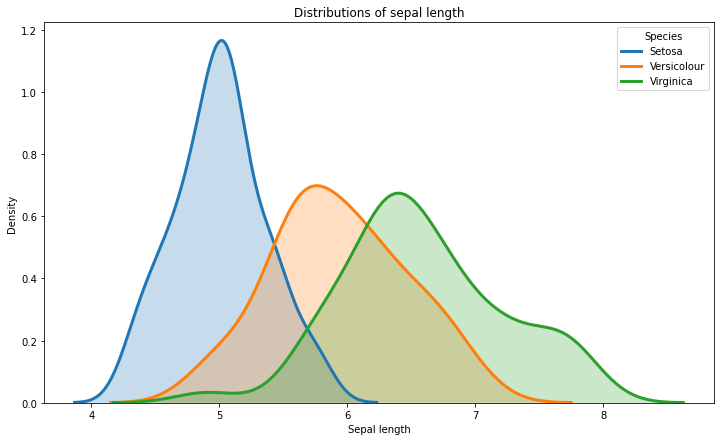

In [130]:
import seaborn as sns
from sklearn import datasets

labels = ["Setosa", "Versicolour", "Virginica"]
iris = datasets.load_iris()
x = iris.data[:, 0]
y = iris.target
data = pd.DataFrame(data={'x': x, 'y': y})

for i in range(3):
    # sns_plot = sns.distplot(data.x[data.y == i])
    sns_plot = sns.distplot(data.x[data.y == i], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},
                 label=labels[i])
fig = sns_plot.get_figure()
fig.set_figwidth(12)
fig.set_figheight(7)

plt.xlabel("Sepal length")
plt.ylabel("Density")
plt.title("Distributions of sepal length")
plt.legend(title="Species");


# ПРАКТИКА - МОДУЛЬ 3

# Кластерный анализ

# 0

Предположим, это один из кластеров в наших данных, тогда чему будет равняться внутрикластерная сумма квадратов?

In [144]:
all_dots_coord = np.array([[-3, 3], [1, 4], [2, 6], [3, 8], [5, 2], [6, 11], [7, 1]])

# Внеутрикластерная сумма квадратов - сумма квадратов расстояний от центроида до каждой точки
def sum_of_squares(all_dots_coord):
    #AB = √(xb - xa)2 + (yb - ya)2
    centroid_coord = get_centroid_coord(all_dots_coord)
    res = np.sum((all_dots_coord[: , 0] - centroid_coord[0]) ** 2) + np.sum((all_dots_coord[: , 1] - centroid_coord[1]) ** 2)
    return res

def get_centroid_coord(all_dots_coord):
    return np.array([np.mean(all_dots_coord[: , 0]), np.mean(all_dots_coord[: , 1])])

sum_of_squares(all_dots_coord)


146.0

## Кластерный анализ - как визуализировать
Чтобы определить, сколько кластеров стоит выделить

(пример из комментариев)

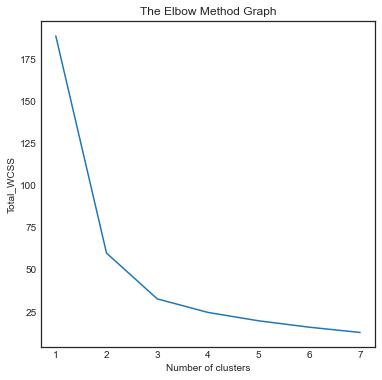

In [145]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import pandas as pd

plt.figure(figsize=(6, 6))
plt.style.use('seaborn-white')

# грузим данные 
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
X = df[['sepal length (cm)','petal width (cm)']].values

# определяем необходимое количество кластеров
total_wcss=[]
n_clusters = 8

for i in range(1,n_clusters): 
    kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )
    kmeans.fit(X)
    total_wcss.append(kmeans.inertia_)

plt.plot(range(1,n_clusters),total_wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('Total_WCSS')
plt.show()

## Иерархическая кластеризация

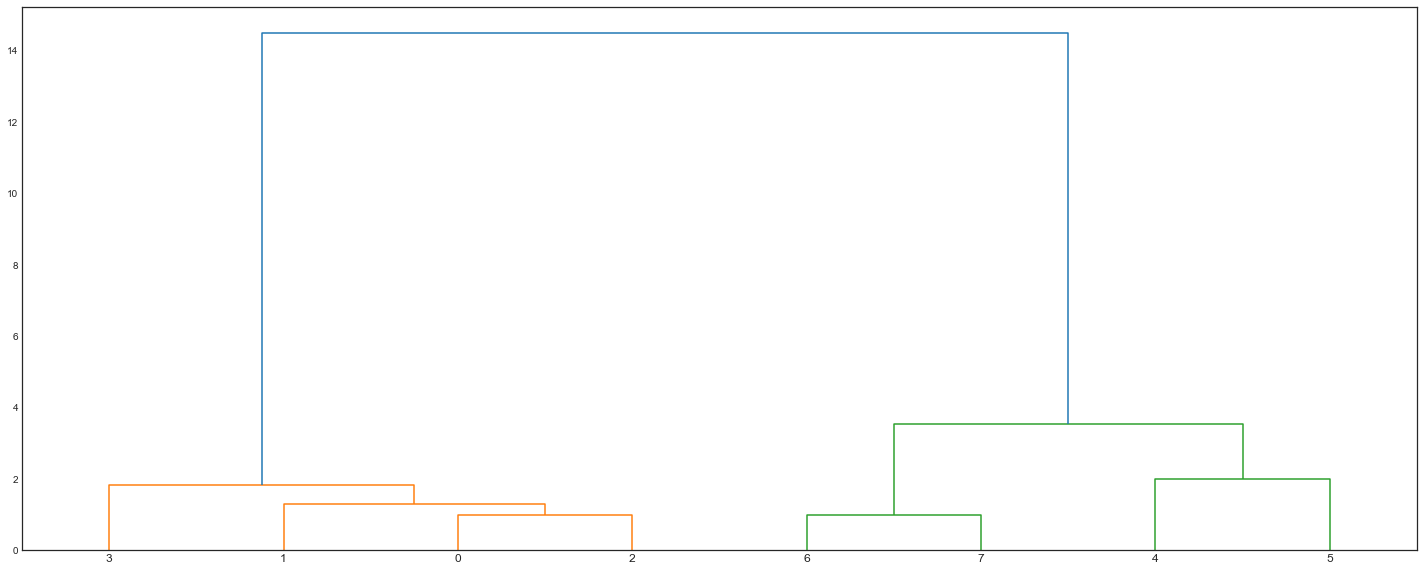

In [149]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
import numpy as np

# Для прорисовки графики
%matplotlib inline

# Наши данные
points = np.array([[1,2], [2,1], [2,2], [1,3], [6,7], [6,5], [7,8], [8,8]], dtype=float)

Z = linkage(points, 'ward')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

plt.show()

# Реализация PCA  на питоне:
## Principal Component Analysis
## Анализ главных компонент

In [69]:
import numpy as np
from pca import pca
import matplotlib.pyplot as plt

# генерируем линейную зависимость оценок
R = np.random.randint(75,120,50)
stat = [elem + np.random.randint(-10,10) for elem in R]
X = np.column_stack((R, stat))

x = X[:,0]
y = X[:,1]

# рисуем диаграмму рассеивания 
plt.figure(figsize=(6, 6))
plt.scatter(x, y)

# добавляем регрессионную прямую
b1, b0 = np.polyfit(x, y, 1) #  b0 - intercept, b1 - slope
plt.plot(x, b0 + b1*x, color='red')
plt.grid()
plt.show()

# используем модуль pca:
# настраиваем модель с 2-мя компонентами
model = pca(n_components=2)
results = model.fit_transform(X)

# столбчатая диаграмма
fig, ax = model.plot()

# диаграмма рассеивания с новыми координатами
fig, ax = model.biplot(n_feat=4)
plt.show()

ModuleNotFoundError: No module named 'pca'

# 1

Напишите функцию smart_hclust, которая получает на вход dataframe  с произвольным числом количественных переменных и число кластеров, которое необходимо выделить при помощи иерархической кластеризации.

Функция должна в исходный набор данных добавлять новую переменную фактор - cluster  -- номер кластера, к которому отнесено каждое из наблюдений.

для кластеризации данных swiss на три кластера мы бы использовали команды:

**linkage(data, method='average', metric='euclidean') # расчет матрицы расстояний**

**dendrogram(Z) # иерархическая кластеризация**

**fcluster(Z, 9.5, criterion='distance') # Разбиваем на кластеры**

,X1,X2,X3,X4,X5,labels
0,11,7,10,10,8,1
1,9,10,10,8,6,1
2,9,2,12,14,11,2
3,9,11,8,10,3,1
4,7,9,10,11,14,2
5,9,11,9,6,9,1
6,16,20,22,19,16,4
7,23,18,21,24,16,4
8,15,21,14,21,21,3
9,19,20,15,17,17,3


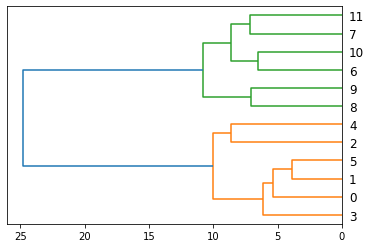

In [29]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
data = pd.read_csv(r'https://stepic.org/media/attachments/course/524/test_data_hclust.csv')

def smart_hclust(data, cluster_number=4):
    # Вычисляем матрицу расстояний
    Z = linkage(data, method='average', metric='euclidean')
    # Визуализируем иерархическую кластеризацию
    dend = dendrogram(Z, orientation='left')
    
    # Разбиваем на кластеры
    # 2й параметр - макс. количество кластеров, на которое мы хотим разбить данные
    labels = fcluster(Z, cluster_number, criterion='maxclust')
    # 2й параметр - порог отсечения (значения по x на дендрограмме)
    
    # labels = fcluster(Z, 9.5, criterion='distance')
    data['labels'] = labels
    
    # Проинтерпритируем результаты кластеризации
    #for i, group in data.groupby(['labels']):
    #    print('=' * 10)
    #    print(f'cluster {i}')
    #    print(group)
    
    return data

smart_hclust(data, 4)

# 2

Интересной особенностью кластерного анализа является тот факт, что мы получаем только итоговый ответ, к какому кластеру принадлежит каждое наблюдение. Однако мы не знаем, по каким переменным различаются выделенные кластеры. Поэтому, если нас интересует не только сам факт того, что мы смогли выделить кластеры в наших данных, но мы также хотим понять, чем же они различаются, разумно сравнить кластеры между собой по имеющимся переменным.

Напишите функцию get_difference, которая получает на вход два аргумента: 

    test_data — набор данных с произвольным числом количественных переменных.
    n_cluster — число кластеров, которое нужно выделить в данных при помощи иерархической кластеризации.

Функция должна вернуть названия переменных, по которым были обнаружен значимые различия между выделенными кластерами (p < 0.05)﻿. Иными словами, после того, как мы выделили заданное число кластеров, мы добавляем в исходные данные новую группирующую переменную — номер кластера, и сравниваем получившиеся группы между собой по количественным переменным при помощи дисперсионного анализа.

**Подсказки:**

    * Не забудьте перевести переменную с номером кластера в фактор! 
    * Вы можете использовать вашу функцию из предыдущего задания.
    * Для поиска различий ﻿используйте ANOVA (функция aov). Давайте договоримся, что для наших целей мы не будем проверять данные на соответствие требованиями к применению этого критерия и не будем думать о поправке на множественные сравнения.

['X1', 'X2', 'X3', 'X4', 'X5']

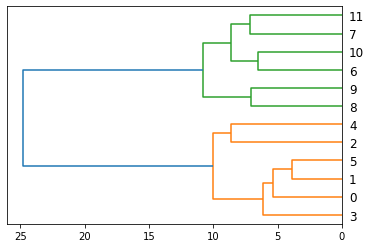

In [67]:
import scipy.stats as stats
data = pd.read_csv(r'https://stepic.org/media/attachments/course/524/test_data_hclust.csv')
data.head()

def get_difference(data, cluster_number):
    # в res - Названия переменных (колонок), которыми кластеры значимо отличаются
    res = []
    column_names = [col_name for col_name in data]
    data = smart_hclust(data, cluster_number)
    data_groupedby_labels = data.groupby(['labels'])
    for column_name in column_names:
        # one-way ANOVA
        pvalue = stats.f_oneway(*[col[column_name].values for i, col in data_groupedby_labels]).pvalue
        # Если как минимум 2 кластера значимо отличаются по текущей переменной (колонке)
        if pvalue < 0.05:
            res.append(column_name)
    return res
    
get_difference(data, 4)

# 3 - 4

Напишите функцию get_pc﻿, которая получает на вход dataframe с произвольным числом количественных переменных. Функция должна выполнять анализ главных компонент и добавлять в исходные данные две новые колонки со значениями первой и второй главной компоненты. Новые переменные должны называться "PC1"  и "PC2" соответственно.

Для выполнения анализа главных компонент используйте функцию ﻿prcomp(). Изучите результат применения этой функции к данным, чтобы найти, где хранятся значения выделенных главных компонент.

Усложним предыдущую задачу! Напишите функцию get_pca2, которая принимает на вход dataframe с произвольным числом количественных переменных. Функция должна рассчитать, какое минимальное число главных компонент объясняет больше 90% изменчивости в исходных данных и добавлять значения этих компонент в исходный dataframe в виде новых переменных.

Рассмотрим работу функции на примере встроенных данных swiss:

In [36]:
from sklearn.decomposition import PCA
data = pd.read_csv(r'https://stepic.org/media/attachments/course/524/pca_test.csv')
print(data.dtypes.value_counts())
def get_pc(data):
    pca = PCA(n_components = 5)
    principalComponents = pca.fit_transform(data.values)
    
    # Определяем, какую часть изменчивости определяют 1я, 2я и тд главные компоненты
    # Выбираем столько главных компонент, чтобы в сумме было больше 90%
    explained_variance = pca.explained_variance_ratio_
    n, sum_of_explained_variance = 0, 0
    while sum_of_explained_variance <= 0.9:
        sum_of_explained_variance += explained_variance[n]
        n += 1
    for i in range(n):
        data['PC' + str(i + 1)] = principalComponents[:, i]
    return data

get_pc(data)

# Альтернативная форма записи - то же самое по сути
#def get_pc(data):
    # pca = PCA(n_components = 5)
    # return data.assign(pc1=pca.fit_transform(data)[:, 0], 
    #       pc2=pca.fit_transform(data)[:, 1])

int64    5
dtype: int64


,V1,V2,V3,V4,V5,PC1,PC2,PC3
0,13,15,12,13,12,-4.500822,-2.364595,2.054657
1,16,11,8,12,6,3.039182,1.929687,3.234643
2,15,7,10,12,13,-2.752467,5.076265,-1.868558
3,12,11,6,6,4,7.837194,-1.688535,-1.581097
4,11,13,13,10,12,-3.623088,-2.952822,-1.839644


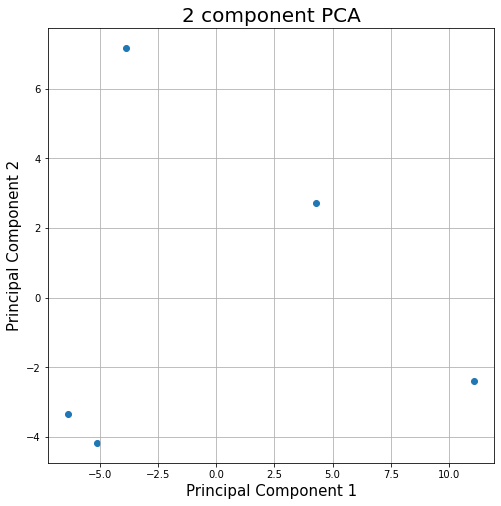

In [113]:
# ВИЗУАЛИЗАЦИЯ PCA
def visualize_pca_projection(finalDf):
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)
    ax.scatter(finalDf.loc[: , 'PC1']
                   , finalDf.loc[: , 'PC2'])
    ax.grid()

finalDf = get_pc(data)
visualize_pca_projection(finalDf)

# 5

Как я говорил, метод главных компонент может применяться для борьбы с мультиколлинеарностью в данных (ситуация, когда некоторые переменные очень сильно коррелируют между собой). Однако иногда некоторые переменные не просто сильно взаимосвязаны, но могут представлять линейную комбинацию друг друга. На такие переменные лучше сразу взглянуть повнимательнее и выяснить, откуда они взялись в наших данных.

Напишите функцию is_multicol, которая получает на вход dataframe произвольного размера с количественными переменными. Функция должна проверять существование строгой мультиколлинеарности, а именно наличие линейной комбинации между предикторами. Линейной комбинацией является ситуация, когда одна переменная может быть выражена через другую переменную при помощи уравнения V1=k∗V2+b V1 = k*V2+b V1=k∗V2+b.
﻿Например V1 = V2 + 4 или V1 = V2 - 5.

Функция возвращает имена переменных, между которыми есть линейная зависимость или cобщение "There is no collinearity in the data".


In [32]:
from numpy import linalg
data = pd.read_csv(r'https://stepic.org/media/attachments/course/524/Norris_2.csv')
data['one'] = 1
print(data)

#print(data[['V1', 'one']])
def is_multicol(data):
    M1 = np.array(data[['V1', 'V2']].values.T)
    V1 = np.array(data['V3'].values)
    print(M1, V1)
    return linalg.det(M1)
    #return linalg.matrix_rank(M1)
    #return linalg.solve(M1, V1)
    

is_multicol(data)

   V1  V2  V3  V4  one
0  13  12   7  11    1
1  15  14  13  10    1
2   8   7  11  16    1
[[13 15  8]
 [12 14  7]] [ 7 13 11]


LinAlgError: Last 2 dimensions of the array must be square

In [41]:
#StudentsPerformance.csv
data = pd.read_csv(r'C:\Audiobooks\ForDS\titanic.csv')
data.columns
data.shape
data.dtypes.value_counts()

int64      5
object     5
float64    2
dtype: int64